In [1]:
def MakePMatrix(omega, which_layer, kx0, ky0, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list):
    det = Uniform_ep_list[which_layer][2][2]*Uniform_mu_list[which_layer][2][2]-Uniform_xi_list[which_layer][2][2]*Uniform_zeta_list[which_layer][2][2]
    
    nuzxee = - (Uniform_mu_list[which_layer][2][2]*Uniform_ep_list[which_layer][2][0]-Uniform_xi_list[which_layer][2][2]*(Uniform_zeta_list[which_layer][2][0]+ky0/omega))/det
    nuzyee = - (Uniform_mu_list[which_layer][2][2]*Uniform_ep_list[which_layer][2][1]-Uniform_xi_list[which_layer][2][2]*(Uniform_zeta_list[which_layer][2][1]-kx0/omega))/det
    nuzxeh = (Uniform_xi_list[which_layer][2][2]*Uniform_mu_list[which_layer][2][0]-Uniform_mu_list[which_layer][2][2]*(Uniform_xi_list[which_layer][2][0]-ky0/omega))/det
    nuzyeh = (Uniform_xi_list[which_layer][2][2]*Uniform_mu_list[which_layer][2][1]-Uniform_mu_list[which_layer][2][2]*(Uniform_xi_list[which_layer][2][1]+kx0/omega))/det
    nuzxhe = (Uniform_zeta_list[which_layer][2][2]*Uniform_ep_list[which_layer][2][0]-Uniform_ep_list[which_layer][2][2]*(Uniform_zeta_list[which_layer][2][0]+ky0/omega))/det
    nuzyhe = (Uniform_zeta_list[which_layer][2][2]*Uniform_ep_list[which_layer][2][1]-Uniform_ep_list[which_layer][2][2]*(Uniform_zeta_list[which_layer][2][1]-kx0/omega))/det
    nuzxhh = - (Uniform_ep_list[which_layer][2][2]*Uniform_mu_list[which_layer][2][0]-Uniform_zeta_list[which_layer][2][2]*(Uniform_xi_list[which_layer][2][0]-ky0/omega))/det
    nuzyhh = - (Uniform_ep_list[which_layer][2][2]*Uniform_mu_list[which_layer][2][1]-Uniform_zeta_list[which_layer][2][2]*(Uniform_xi_list[which_layer][2][1]+kx0/omega))/det   
    
    
    J = np.ones((4,4), dtype = complex)
    
    P = np.zeros((4,4), dtype = complex)
    
    temp0 = np.array([[Uniform_zeta_list[which_layer][1][0], Uniform_zeta_list[which_layer][1][1], Uniform_mu_list[which_layer][1][0], Uniform_mu_list[which_layer][1][1]], [-Uniform_zeta_list[which_layer][0][0], -Uniform_zeta_list[which_layer][0][1], -Uniform_mu_list[which_layer][0][0], -Uniform_mu_list[which_layer][0][1]], [-Uniform_ep_list[which_layer][1][0], -Uniform_ep_list[which_layer][1][1], -Uniform_xi_list[which_layer][1][0], -Uniform_xi_list[which_layer][1][1]], [Uniform_ep_list[which_layer][0][0], Uniform_ep_list[which_layer][0][1], Uniform_xi_list[which_layer][0][0], Uniform_xi_list[which_layer][0][1]]])
    temp1 = np.diag((Uniform_zeta_list[which_layer][1][2]+kx0/omega, -Uniform_zeta_list[which_layer][0][2]+ky0/omega, -Uniform_ep_list[which_layer][1][2], Uniform_ep_list[which_layer][0][2]))
    temp2 = np.diag((nuzxee, nuzyee, nuzxeh, nuzyeh))
    
    temp3 = np.diag((Uniform_mu_list[which_layer][1][2], -Uniform_mu_list[which_layer][0][2], -Uniform_xi_list[which_layer][1][2]+kx0/omega, Uniform_xi_list[which_layer][0][2]+ky0/omega))
    temp4 = np.diag((nuzxhe, nuzyhe, nuzxhh, nuzyhh))
    
    P = omega*(temp0 + temp1 @ J @ temp2 + temp3 @ J @ temp4)
    
    return P


def Kmatrix(n, theta, phi):
    K   = np.array([[-np.sin(phi), -np.cos(phi)*np.cos(theta), -np.sin(phi), np.cos(phi)*np.cos(theta)], [np.cos(phi), -np.sin(phi)*np.cos(theta), np.cos(phi), np.sin(phi)*np.cos(theta)], [-n/eta0*np.cos(phi)*np.cos(theta), n/eta0*np.sin(phi), n/eta0*np.cos(phi)*np.cos(theta), n/eta0*np.sin(phi)], [-n/eta0*np.sin(phi)*np.cos(theta), -n1/eta0*np.cos(phi), n/eta0*np.sin(phi)*np.cos(theta), -n/eta0*np.cos(phi)]])
    
    return K
    
    
def MakeMMatrix(omega, which_layer, kx0, ky0, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list):
    
    P = MakePMatrix(omega, which_layer, kx0, ky0, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list)
    
    w, v = np.linalg.eig(P)

    expG = np.zeros((4, 4), dtype = complex)
    
    for i in range(4):
        expG[i, i] = np.exp(1j*w[i]*thickness_list[which_layer])
    
    M  = v @ expG @ np.linalg.inv(v)
    
    return M

def BandStructure(M, thickness_list):
    
    w, v = np.linalg.eig(M)
    
    q    = np.log(w)/(1j*np.sum(thickness_list))
    
    return q

def RandT(M):
    r  = np.zeros((2,2), dtype = complex)
    t  = np.zeros((2,2), dtype = complex)
    
    det = (M[2,2]*M[3,3] - M[2,3]*M[3,2])
    
    r[0, 0] = (M[2, 3]*M[3,0]-M[2,0]*M[3,3])/det
    r[0, 1] = (M[2, 3]*M[3,1]-M[2,1]*M[3,3])/det
    r[1, 0] = (M[2, 0]*M[3,2]-M[3,0]*M[2,2])/det
    r[1, 1] = (M[2, 1]*M[3,2]-M[3,1]*M[2,2])/det
    
    t[0, 0] = ((M[0, 2]*M[2, 3]-M[0, 3]*M[2, 2])*M[3, 0]+(M[0, 3]*M[2,0]-M[0,0]*M[2, 3])*M[3,2]+(M[0,0]*M[2,2]-M[0, 2]*M[2,0])*M[3,3])/det
    t[0, 1] = M[0, 1] + ((M[0,2]*M[2,3]-M[0, 3]*M[2,2])*M[3,1]+(M[0, 3]*M[3, 2]-M[0, 2]*M[3,3])*M[2,1])/det
    t[1, 0] = ((M[1,2]*M[2,3]-M[1,3]*M[2,2])*M[3,0]+(M[1,3]*M[2,0]-M[1,0]*M[2,3])*M[3,2]+(M[1,0]*M[2,2]-M[1,2]*M[2,0])*M[3,3])/det
    t[1, 1] = M[1,1] + ((M[1,2]*M[2,3]-M[1,3]*M[2,2])*M[3,1]+(M[1,3]*M[3,2]-M[1,2]*M[3,3])*M[2,1])/det
    
    return r, t
    
def RefTrans(r, t, theta, n1, n2):
    Rss = np.abs(r[0,0])**2
    Rsp = np.abs(r[0,1])**2
    Rps = np.abs(r[1,0])**2
    Rpp = np.abs(r[1,1])**2
    
    thetar  = np.arcsin(n1*np.sin(theta)/n2)
    
    Tss = (n2/n1)*(np.real(np.cos(thetar))/np.cos(theta))*np.abs(t[0,0])**2
    Tsp = (n2/n1)*(np.real(np.cos(thetar))/np.cos(theta))*np.abs(t[0,1])**2
    Tps = (n2/n1)*(np.real(np.cos(thetar))/np.cos(theta))*np.abs(t[1,0])**2
    Tpp = (n2/n1)*(np.real(np.cos(thetar))/np.cos(theta))*np.abs(t[1,1])**2
    
    As = 1 - (Rss+Rps+Tss+Tps)
    Ap = 1 - (Rpp+Rsp+Tpp+Tsp)
    
    return Rss, Rsp, Rps, Rpp, Tss, Tsp, Tps, Tpp, As, Ap

#def ComputeFields(omega, which_layer, kx0, ky0, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, z_offset, amps, ampp):
    
#    if bd.isinstance(z_offset,float) or bd.isinstance(z_offset,int):
#        zl = [z_offset]
#    else:
#        zl = z_offset
    
#    P = MakePMatrix(omega, which_layer, kx0, ky0, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list)
#    w, v = np.linalg.eig(P)   # w- is the wavevector in z-axis
    
#    eh = []
    
#    for zoff in zl:
        
    
#    return eh

1. Structure from the book. A, B, and C layers with vacuum incidence and substrate. 

In [14]:
import numpy as np
import scipy as sp
import scipy.constants as spcs


# universal constants 
c       = spcs.c
eps0    = spcs.epsilon_0
mu0     = spcs.mu_0
eta0    = np.sqrt(mu0/eps0)

# problem parameters 
lambda0 = 0.56e-6 #um
omega   = 2*np.pi*c/lambda0
phi     = 0
theta   = 0
n1      = 1
n2      = 1
thetar  = np.arcsin(n1*np.sin(theta)/n2)

kx0     = omega/c*n1*np.cos(phi)*np.sin(theta)
ky0     = omega/c*n1*np.sin(phi)*np.sin(theta)

# material parameters
epsA = np.array([[2.9+0.04*1j, 0, 0], [0, 2.5+0.03*1j, 0], [0, 0, 2.1+0.02*1j]])*eps0
muA  = np.array([[1.1+0.025*1j, 0, 0], [0, 1.05+0.015*1j, 0], [0, 0, 1.02+0.012*1j]])*mu0
xiA  = np.array([[0.1+0.0008*1j, 0, 0], [0, 0.07+0.0006*1j, 0], [0, 0, 0.06+0.0005*1j]])*1j*np.sqrt(eps0*mu0)
zetA = -xiA
dA   = 0.9*lambda0

epsB = np.array([[2.4 + 1j*0.03, 0, 0], [0, 1.9 + 1j*0.02, 0], [0, 0, 2.4 + 1j*0.03]])*eps0
muB  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiB  = np.zeros((3,3), dtype = complex)
zetB = np.zeros((3,3), dtype = complex)
dB   = 1.8*lambda0

epsC = np.array([[4.1+0.08*1j, -(0.8+0.005*1j)*1j, 0], [(0.8+0.005*1j)*1j, 4.1+0.08*1j, 0], [0, 0, 3.4+0.06*1j]])*eps0
muC  = np.array([[1.3+0.04*1j, -(0.35+0.003*1j)*1j, 0], [(0.35+0.003*1j)*1j, 1.3+0.04*1j, 0], [0, 0, 1.1+0.03*1j]])*mu0
xiC  = np.array([[0.06+0.0012*1j, -(0.01+0.0003*1j)*1j, 0], [(0.01+0.0003*1j)*1j, 0.06+0.0012*1j, 0], [0, 0, 0.04+0.001*1j]])*1j*np.sqrt(eps0*mu0)
zetC = -xiC
dC   = 1.2*lambda0


Uniform_ep_list = [epsA, epsB, epsC]
Uniform_mu_list = [muA, muB, muC]
Uniform_xi_list = [xiA, xiB, xiC]
Uniform_zeta_list = [zetA, zetB, zetC]
thickness_list  = [dA, dB, dC]


# calculations 
M1   = MakeMMatrix(omega, 0, kx0, ky0, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
M2   = MakeMMatrix(omega, 1, kx0, ky0, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
M3   = MakeMMatrix(omega, 2, kx0, ky0, Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)

Ktr  = np.array([[-np.sin(phi), -np.cos(phi)*np.cos(thetar), -np.sin(phi), np.cos(phi)*np.cos(thetar)], [np.cos(phi), -np.sin(phi)*np.cos(thetar), np.cos(phi), np.sin(phi)*np.cos(thetar)], [-n2/eta0*np.cos(phi)*np.cos(thetar), n2/eta0*np.sin(phi), n2/eta0*np.cos(phi)*np.cos(thetar), n2/eta0*np.sin(phi)], [-n2/eta0*np.sin(phi)*np.cos(thetar), -n2/eta0*np.cos(phi), n2/eta0*np.sin(phi)*np.cos(thetar), -n2/eta0*np.cos(phi)]])
Kinc = np.array([[-np.sin(phi), -np.cos(phi)*np.cos(theta), -np.sin(phi), np.cos(phi)*np.cos(theta)], [np.cos(phi), -np.sin(phi)*np.cos(theta), np.cos(phi), np.sin(phi)*np.cos(theta)], [-n1/eta0*np.cos(phi)*np.cos(theta), n1/eta0*np.sin(phi), n1/eta0*np.cos(phi)*np.cos(theta), n1/eta0*np.sin(phi)], [-n1/eta0*np.sin(phi)*np.cos(theta), -n1/eta0*np.cos(phi), n1/eta0*np.sin(phi)*np.cos(theta), -n1/eta0*np.cos(phi)]])

M    = np.linalg.inv(Ktr) @ M3 @ M2 @ M1 @ Kinc

r, t = RandT(M)

q    = BandStructure(M3 @ M2 @ M1, thickness_list)

Rss, Rsp, Rps, Rpp, Tss, Tsp, Tps, Tpp, As, Ap = RefTrans(r, t, theta, n1, n2)

In [15]:
q

array([1118603.38289081-316489.96132255j,
       -674737.70495442-314469.15980354j,
       -785666.78895909+321049.57815857j,
        479893.09579586+314052.30251072j])

In [17]:
w, v = np.linalg.eig(M)

array([-674737.70495442-314469.15980354j,
       -785666.78895909+321049.57815857j,
        479893.09579586+314052.30251072j,
       1118603.38289081-316489.96132255j])

In [27]:
q

array([-15831493.2118671 -354455.9353847j ,
       -13416605.76077173-356700.49606569j,
        15831493.2118671 +354455.9353847j ,
        13416605.76077173+356700.49606569j])

In [25]:
np.exp(1j*q*thickness_list[0])

array([-0.14916864-1.18625517j,  1.06236033-0.55143538j,
       -0.10435368+0.82986673j,  0.74151422+0.38489499j])

In [174]:
v @ expG @ np.linalg.inv(v)

array([[ 7.23711078e-01+3.16277435e-01j,  5.73523889e-03-2.14021666e-01j,
        -1.04708386e+02-1.59553672e+01j, -1.21389500e+02-6.21646385e+01j],
       [-5.86452939e-03+2.61482538e-01j,  7.26988714e-01+2.67513612e-01j,
         1.46882561e+02+7.19766475e+01j, -1.29015971e+02-2.53110989e+01j],
       [ 2.52665795e-03+2.47134393e-06j,  2.77921748e-03+1.59089203e-03j,
         7.25363302e-01+3.14438943e-01j,  4.15984641e-03-2.12268668e-01j],
       [-3.35856955e-03-1.89853550e-03j,  3.07906904e-03+2.95808794e-04j,
        -7.43992187e-03+2.63235536e-01j,  7.25336490e-01+2.69352105e-01j]])

In [2]:
import numpy as np
import scipy as sp
import scipy.constants as spcs


# universal constants 
c       = spcs.c
eps0    = spcs.epsilon_0
mu0     = spcs.mu_0
eta0    = np.sqrt(mu0/eps0)

# problem parameters 
m       = 37
lambda0 = 0.56e-6 #um
omega   = 2*np.pi*c/lambda0
phi     = np.linspace(0, np.pi, m)
theta   = np.linspace(0, 0.99*np.pi/2, m)
n1      = 1
n2      = 1
thetar  = np.arcsin(n1*np.sin(theta)/n2)


kx0     = np.zeros((m, m), dtype = complex)
ky0     = np.zeros((m, m), dtype = complex)

for i in range(m):
    for j in range(m):
        kx0[i, j]  = omega/c*n1*np.cos(phi[j])*np.sin(theta[i])
        ky0[i, j]  = omega/c*n1*np.sin(phi[j])*np.sin(theta[i])

# material parameters
epsA = np.array([[2.9+0.04*1j, 0, 0], [0, 2.5+0.03*1j, 0], [0, 0, 2.1+0.02*1j]])*eps0
muA  = np.array([[1.1+0.025*1j, 0, 0], [0, 1.05+0.015*1j, 0], [0, 0, 1.02+0.012*1j]])*mu0
xiA  = np.array([[0.1+0.0008*1j, 0, 0], [0, 0.07+0.0006*1j, 0], [0, 0, 0.06+0.0005*1j]])*1j*np.sqrt(eps0*mu0)
zetA = -xiA
dA   = 0.9*lambda0

epsB = np.array([[2.4 + 1j*0.03, 0, 0], [0, 1.9 + 1j*0.02, 0], [0, 0, 2.4 + 1j*0.03]])*eps0
muB  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiB  = np.zeros((3,3), dtype = complex)
zetB = np.zeros((3,3), dtype = complex)
dB   = 1.8*lambda0

epsC = np.array([[4.1+0.08*1j, -(0.8+0.005*1j)*1j, 0], [(0.8+0.005*1j)*1j, 4.1+0.08*1j, 0], [0, 0, 3.4+0.06*1j]])*eps0
muC  = np.array([[1.3+0.04*1j, -(0.35+0.003*1j)*1j, 0], [(0.35+0.003*1j)*1j, 1.3+0.04*1j, 0], [0, 0, 1.1+0.03*1j]])*mu0
xiC  = np.array([[0.06+0.0012*1j, -(0.01+0.0003*1j)*1j, 0], [(0.01+0.0003*1j)*1j, 0.06+0.0012*1j, 0], [0, 0, 0.04+0.001*1j]])*1j*np.sqrt(eps0*mu0)
zetC = -xiC
dC   = 1.2*lambda0


Uniform_ep_list = [epsA, epsB, epsC]
Uniform_mu_list = [muA, muB, muC]
Uniform_xi_list = [xiA, xiB, xiC]
Uniform_zeta_list = [zetA, zetB, zetC]
thickness_list  = [dA, dB, dC]

M1   = np.zeros((m, m, 4, 4), dtype = complex)
M2   = np.zeros((m, m, 4, 4), dtype = complex)
M3   = np.zeros((m, m, 4, 4), dtype = complex)

Ktr  = np.zeros((m, m, 4, 4), dtype = complex)
Kinc = np.zeros((m, m, 4, 4), dtype = complex)
M    = np.zeros((m, m, 4, 4), dtype = complex)

r    = np.zeros((m, m, 2, 2), dtype = complex)
t    = np.zeros((m, m, 2, 2), dtype = complex)

Rss  = np.zeros((m, m), dtype = float)
Rsp  = np.zeros((m, m), dtype = float)
Rps  = np.zeros((m, m), dtype = float)
Rpp  = np.zeros((m, m), dtype = float)
Tss  = np.zeros((m, m), dtype = float)
Tsp  = np.zeros((m, m), dtype = float)
Tps  = np.zeros((m, m), dtype = float)
Tpp  = np.zeros((m, m), dtype = float)
As  = np.zeros((m, m), dtype = float)
Ap  = np.zeros((m, m), dtype = float)

for i in range(m):
    for j in range(m):
        M1[i][j] = MakeMMatrix(omega, 0, kx0[i][j], ky0[i][j], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
        M2[i][j] = MakeMMatrix(omega, 1, kx0[i][j], ky0[i][j], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
        M3[i][j] = MakeMMatrix(omega, 2, kx0[i][j], ky0[i][j], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
        
        Ktr[i, j]  = Kmatrix(n2, thetar[i], phi[j])
        Kinc[i, j] = Kmatrix(n1, theta[i], phi[j])
        
        M[i][j]  = np.linalg.inv(Ktr[i][j]) @ M3[i][j] @ M2[i][j] @ M1[i][j] @ Kinc[i][j]
        
        r[i][j], t[i][j] = RandT(M[i][j])
        
        Rss[i][j], Rsp[i][j], Rps[i][j], Rpp[i][j], Tss[i][j], Tsp[i][j], Tps[i][j], Tpp[i][j], As[i][j], Ap[i][j] = RefTrans(r[i][j], t[i][j], theta[j], n1, n2)   

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

(0.0, 0.86)

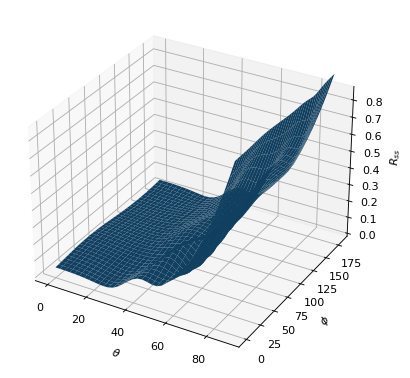

In [4]:
Phi, Theta = np.meshgrid(phi, theta)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(Theta*180/np.pi, Phi*180/np.pi, Rss)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel(r'$R_{ss}$')
ax.set_zlim(0, 0.86)

(0.0, 0.012)

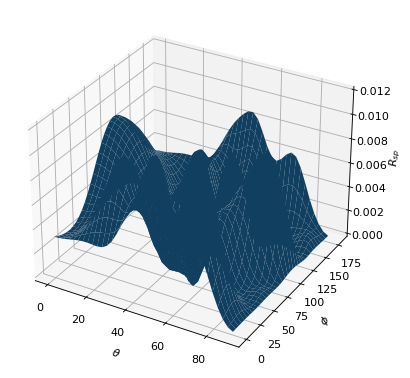

In [6]:
Phi, Theta = np.meshgrid(phi, theta)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(Theta*180/np.pi, Phi*180/np.pi, Rsp)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel(r'$R_{sp}$')
ax.set_zlim(0, 0.012)

(0.0, 0.195)

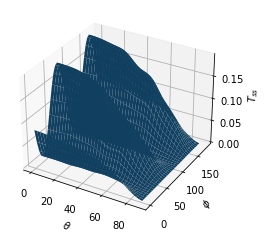

In [27]:
Phi, Theta = np.meshgrid(phi, theta)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Theta*180/np.pi, Phi*180/np.pi, Tss)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel(r'$T_{ss}$')
ax.set_zlim(0, 0.195)

(0.0, 0.215)

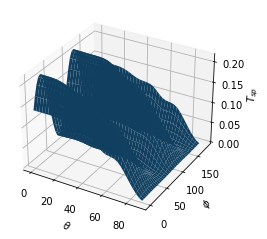

In [28]:
Phi, Theta = np.meshgrid(phi, theta)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Theta*180/np.pi, Phi*180/np.pi, Tsp)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel(r'$T_{sp}$')
ax.set_zlim(0, 0.215)

(0.0, 0.013)

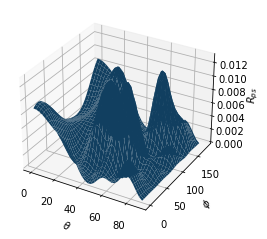

In [29]:
Phi, Theta = np.meshgrid(phi, theta)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Theta*180/np.pi, Phi*180/np.pi, Rps)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel(r'$R_{ps}$')
ax.set_zlim(0, 0.013)

(0.0, 0.22)

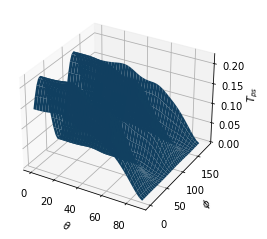

In [30]:
Phi, Theta = np.meshgrid(phi, theta)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Theta*180/np.pi, Phi*180/np.pi, Tps)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel(r'$T_{ps}$')
ax.set_zlim(0, 0.22)

(0.0, 0.86)

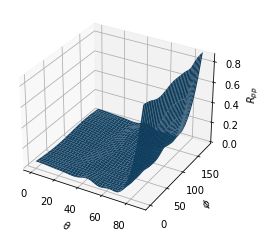

In [32]:

Phi, Theta = np.meshgrid(phi, theta)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Theta*180/np.pi, Phi*180/np.pi, Rpp)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel(r'$R_{pp}$')
ax.set_zlim(0, 0.86)

(0.0, 0.198)

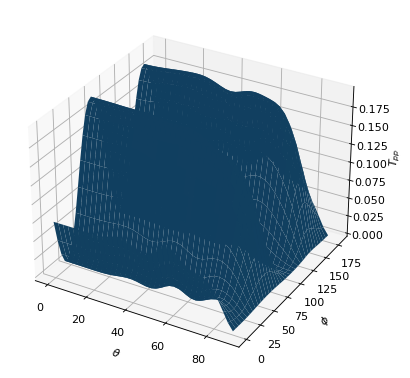

In [7]:

Phi, Theta = np.meshgrid(phi, theta)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(Theta*180/np.pi, Phi*180/np.pi, Tpp)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel(r'$T_{pp}$')
ax.set_zlim(0, 0.198)

(0.2, 0.87)

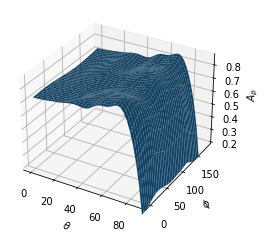

In [35]:
Phi, Theta = np.meshgrid(phi, theta)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Theta*180/np.pi, Phi*180/np.pi, Ap)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel(r'$A_{p}$')
ax.set_zlim(0.2, 0.87)

(0.15, 0.75)

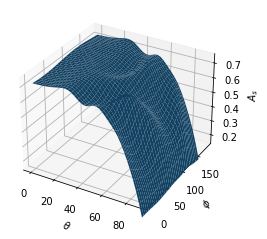

In [36]:
Phi, Theta = np.meshgrid(phi, theta)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Theta*180/np.pi, Phi*180/np.pi, As)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel(r'$A_{s}$')
ax.set_zlim(0.15, 0.75)

Extra1. Structure from M. Mansuripur, Analysis of multilayer thin-film structures containing magneto-optic and anisotropic media at oblique incidence using 2×2 matrices, Journal of Applied Physics 67, 6466 (1990). 

In [15]:
import numpy as np
import scipy as sp
import scipy.constants as spcs


# universal constants 
c       = spcs.c
eps0    = spcs.epsilon_0
mu0     = spcs.mu_0
eta0    = np.sqrt(mu0/eps0)

# problem parameters 
m       = 100
lambda0 = 0.83e-6 #um
omega   = 2*np.pi*c/lambda0
phi     = 0
theta   = np.linspace(0, np.pi/2-0.001, m)
n1      = 1
n2      = 1
thetar  = np.arcsin(n1*np.sin(theta)/n2)


kx0     = np.zeros((m, 1), dtype = complex)
ky0     = np.zeros((m, 1), dtype = complex)

for i in range(m):
    kx0[i, 0]  = omega/c*n1*np.cos(phi)*np.sin(theta[i])
    ky0[i, 0]  = omega/c*n1*np.sin(phi)*np.sin(theta[i])

# material parameters
epsA = np.array([[1.449**2, 0, 0], [0, 1.449**2, 0], [0, 0, 1.449**2]])*eps0
muA  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiA  = np.zeros((3,3), dtype = complex)
zetA = np.zeros((3,3), dtype = complex)
dA   = 0.1432e-6

epsB = np.array([[-4.8984+1j*19.415, 0.4322 +1j*0.0058, 0], [-(0.4322 +1j*0.0058), -4.8984+1j*19.415, 0], [0, 0, -4.8984+1j*19.415]])*eps0
muB  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiB  = np.zeros((3,3), dtype = complex)
zetB = np.zeros((3,3), dtype = complex)
dB   = 20e-9

epsC = np.array([[1.449**2, 0, 0], [0, 1.449**2, 0], [0, 0, 1.449**2]])*eps0
muC  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiC  = np.zeros((3,3), dtype = complex)
zetC = np.zeros((3,3), dtype = complex)
dC   = 0.1432e-6

epsD = np.array([[-61.4936+1j*45.705, 0, 0], [0, -61.4936+1j*45.705, 0], [0, 0, -61.4936+1j*45.705]])*eps0
muD  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiD  = np.zeros((3,3), dtype = complex)
zetD = np.zeros((3,3), dtype = complex)
dD   = 0.5e-6


Uniform_ep_list = [epsA, epsB, epsC, epsD]
Uniform_mu_list = [muA, muB, muC, muD]
Uniform_xi_list = [xiA, xiB, xiC, xiD]
Uniform_zeta_list = [zetA, zetB, zetC, xiD]
thickness_list  = [dA, dB, dC, dD]

M1   = np.zeros((m, 1, 4, 4), dtype = complex)
M2   = np.zeros((m, 1, 4, 4), dtype = complex)
M3   = np.zeros((m, 1, 4, 4), dtype = complex)
M4   = np.zeros((m, 1, 4, 4), dtype = complex)


Ktr  = np.zeros((m, 1, 4, 4), dtype = complex)
Kinc = np.zeros((m, 1, 4, 4), dtype = complex)
M    = np.zeros((m, 1, 4, 4), dtype = complex)

r    = np.zeros((m, 1, 2, 2), dtype = complex)
t    = np.zeros((m, 1, 2, 2), dtype = complex)

Rss  = np.zeros((m, 1), dtype = float)
Rsp  = np.zeros((m, 1), dtype = float)
Rps  = np.zeros((m, 1), dtype = float)
Rpp  = np.zeros((m, 1), dtype = float)
Tss  = np.zeros((m, 1), dtype = float)
Tsp  = np.zeros((m, 1), dtype = float)
Tps  = np.zeros((m, 1), dtype = float)
Tpp  = np.zeros((m, 1), dtype = float)
As   = np.zeros((m, 1), dtype = float)
Ap   = np.zeros((m, 1), dtype = float)

for i in range(m):
    M1[i, 0] = MakeMMatrix(omega, 0, kx0[i, 0], ky0[i, 0], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
    M2[i, 0] = MakeMMatrix(omega, 1, kx0[i, 0], ky0[i, 0], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
    M3[i, 0] = MakeMMatrix(omega, 2, kx0[i, 0], ky0[i, 0], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
    M4[i, 0] = MakeMMatrix(omega, 3, kx0[i, 0], ky0[i, 0], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
        
    Ktr[i, 0]  = Kmatrix(n2, thetar[i], phi)
    Kinc[i, 0] = Kmatrix(n1, theta[i], phi)
    
    M[i, 0]  = np.linalg.inv(Ktr[i, 0]) @ M4[i,0] @ M3[i, 0] @ M2[i, 0] @ M1[i, 0] @ Kinc[i, 0]
        
    r[i, 0], t[i, 0] = RandT(M[i, 0])
        
    Rss[i, 0], Rsp[i, 0], Rps[i, 0], Rpp[i, 0], Tss[i, 0], Tsp[i, 0], Tps[i, 0], Tpp[i, 0], As[i, 0], Ap[i, 0] = RefTrans(r[i, 0], t[i, 0], theta[i], n1, n2)   

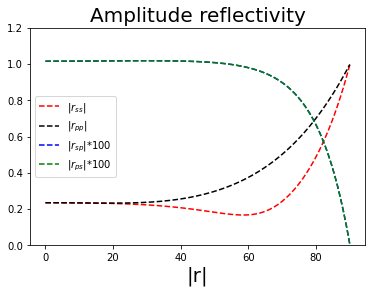

In [22]:
plt.plot(theta*180/np.pi, np.sqrt(Rss), 'r--', label = r'$|r_{ss}|$')
plt.plot(theta*180/np.pi, np.sqrt(Rpp), 'k--', label = r'$|r_{pp}|$')
plt.plot(theta*180/np.pi, np.sqrt(Rsp)*100, 'b--', label = r'$|r_{sp}|$*100')
plt.plot(theta*180/np.pi, np.sqrt(Rps)*100, 'g--', label = r'$|r_{ps}|$*100')
plt.legend()
plt.title(r'Amplitude reflectivity', fontsize = 20)
plt.xlabel(r'$\Theta$ (deg)', fontsize = 20)
plt.xlabel(r'|r|', fontsize = 20)
plt.ylim([0, 1.2])
plt.show()

2. Bulk band structure calculation. Calculation of propagation constant from eigenvalue of transfer matrix

In [4]:
import numpy as np
import scipy as sp
import scipy.constants as spcs


# universal constants 
c       = spcs.c
eps0    = spcs.epsilon_0
mu0     = spcs.mu_0
eta0    = np.sqrt(mu0/eps0)

# problem parameters 
m       = 37
lambda0 = 0.56e-6 #um
omega   = 2*np.pi*c/lambda0
phi     = np.linspace(0, np.pi, m)
theta   = np.linspace(0, 0.99*np.pi/2, m)
n1      = 1
n2      = 1
thetar  = np.arcsin(n1*np.sin(theta)/n2)


kx0     = np.zeros((m, m), dtype = complex)
ky0     = np.zeros((m, m), dtype = complex)

for i in range(m):
    for j in range(m):
        kx0[i, j]  = omega/c*n1*np.cos(phi[j])*np.sin(theta[i])
        ky0[i, j]  = omega/c*n1*np.sin(phi[j])*np.sin(theta[i])

# material parameters
epsA = np.array([[2.9+0.04*1j, 0, 0], [0, 2.5+0.03*1j, 0], [0, 0, 2.1+0.02*1j]])*eps0
muA  = np.array([[1.1+0.025*1j, 0, 0], [0, 1.05+0.015*1j, 0], [0, 0, 1.02+0.012*1j]])*mu0
xiA  = np.array([[0.1+0.0008*1j, 0, 0], [0, 0.07+0.0006*1j, 0], [0, 0, 0.06+0.0005*1j]])*1j*np.sqrt(eps0*mu0)
zetA = -xiA
dA   = 0.9*lambda0

epsB = np.array([[2.4 + 1j*0.03, 0, 0], [0, 1.9 + 1j*0.02, 0], [0, 0, 2.4 + 1j*0.03]])*eps0
muB  = np.array([[1., 0, 0], [0, 1., 0], [0, 0, 1.]])*mu0
xiB  = np.zeros((3,3), dtype = complex)
zetB = np.zeros((3,3), dtype = complex)
dB   = 1.8*lambda0

epsC = np.array([[4.1+0.08*1j, -(0.8+0.005*1j)*1j, 0], [(0.8+0.005*1j)*1j, 4.1+0.08*1j, 0], [0, 0, 3.4+0.06*1j]])*eps0
muC  = np.array([[1.3+0.04*1j, -(0.35+0.003*1j)*1j, 0], [(0.35+0.003*1j)*1j, 1.3+0.04*1j, 0], [0, 0, 1.1+0.03*1j]])*mu0
xiC  = np.array([[0.06+0.0012*1j, -(0.01+0.0003*1j)*1j, 0], [(0.01+0.0003*1j)*1j, 0.06+0.0012*1j, 0], [0, 0, 0.04+0.001*1j]])*1j*np.sqrt(eps0*mu0)
zetC = -xiC
dC   = 1.2*lambda0


Uniform_ep_list = [epsA, epsB, epsC]
Uniform_mu_list = [muA, muB, muC]
Uniform_xi_list = [xiA, xiB, xiC]
Uniform_zeta_list = [zetA, zetB, zetC]
thickness_list  = [dA, dB, dC]

M1   = np.zeros((m, m, 4, 4), dtype = complex)
M2   = np.zeros((m, m, 4, 4), dtype = complex)
M3   = np.zeros((m, m, 4, 4), dtype = complex)

Ktr  = np.zeros((m, m, 4, 4), dtype = complex)
Kinc = np.zeros((m, m, 4, 4), dtype = complex)
M    = np.zeros((m, m, 4, 4), dtype = complex)

q    = np.zeros((m, m, 4), dtype = complex)

r    = np.zeros((m, m, 2, 2), dtype = complex)
t    = np.zeros((m, m, 2, 2), dtype = complex)

Rss  = np.zeros((m, m), dtype = float)
Rsp  = np.zeros((m, m), dtype = float)
Rps  = np.zeros((m, m), dtype = float)
Rpp  = np.zeros((m, m), dtype = float)
Tss  = np.zeros((m, m), dtype = float)
Tsp  = np.zeros((m, m), dtype = float)
Tps  = np.zeros((m, m), dtype = float)
Tpp  = np.zeros((m, m), dtype = float)
As  = np.zeros((m, m), dtype = float)
Ap  = np.zeros((m, m), dtype = float)



for i in range(m):
    for j in range(m):
        M1[i][j] = MakeMMatrix(omega, 0, kx0[i][j], ky0[i][j], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
        M2[i][j] = MakeMMatrix(omega, 1, kx0[i][j], ky0[i][j], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
        M3[i][j] = MakeMMatrix(omega, 2, kx0[i][j], ky0[i][j], Uniform_ep_list, Uniform_mu_list, Uniform_xi_list, Uniform_zeta_list, thickness_list)
        
        Ktr[i, j]  = Kmatrix(n2, thetar[i], phi[j])
        Kinc[i, j] = Kmatrix(n1, theta[i], phi[j])
        
        M[i][j]  = M3[i][j] @ M2[i][j] @ M1[i][j]
        
        q[i][j]  = BandStructure(M[i][j], thickness_list)
        
        
        r[i][j], t[i][j] = RandT(np.linalg.inv(Ktr[i][j]) @ M[i][j] @ Kinc[i][j])
        
        Rss[i][j], Rsp[i][j], Rps[i][j], Rpp[i][j], Tss[i][j], Tsp[i][j], Tps[i][j], Tpp[i][j], As[i][j], Ap[i][j] = RefTrans(r[i][j], t[i][j], theta[j], n1, n2) 

In [6]:
q[0][0]

array([1118603.38289081-316489.96132255j,
       -674737.70495442-314469.15980354j,
       -785666.78895909+321049.57815857j,
        479893.09579586+314052.30251072j])

In [11]:
q

array([1118603.38289081-316489.96132255j,
       -674737.70495442-314469.15980354j,
       -785666.78895909+321049.57815857j,
        479893.09579586+314052.30251072j])